# An Example Attack On Plant Inputs

In [1]:
import pywrapfst as fst
syms = fst.SymbolTable()
syms.add_symbol('e')  # Epsilon (empty character)
syms.add_symbol('i1')
syms.add_symbol('i2')

2

## Plant $\mathcal{P}$

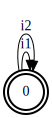

In [2]:
P = fst.Fst()
P.add_state()
P.set_start(0).set_final(0)
P.add_arc(0,fst.Arc(1,1,0,0)).add_arc(0,fst.Arc(2,2,0,0))
P.set_input_symbols(syms).set_output_symbols(syms).arcsort()

## Model of the Desired Language $K$ 

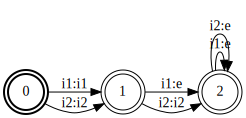

In [3]:
MK = fst.Fst()
MK.add_state()
MK.set_start(0).set_final(0)
MK.set_final(MK.add_state())
MK.add_arc(0,fst.Arc(1,1,0,1)).add_arc(0,fst.Arc(2,2,0,1))
MK.set_final(MK.add_state())
MK.add_arc(1,fst.Arc(1,0,0,2)).add_arc(1,fst.Arc(2,2,0,2))
MK.add_arc(2,fst.Arc(1,0,0,2)).add_arc(2,fst.Arc(2,0,0,2))
MK.set_input_symbols(syms).set_output_symbols(syms).arcsort()

## Input Attacker $\mathcal{A}_{I}$

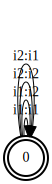

In [4]:
AI = fst.Fst()
AI.add_state()
AI.set_start(0).set_final(0)
AI.add_arc(0,fst.Arc(1,1,0,0)).add_arc(0,fst.Arc(2,2,0,0))
AI.add_arc(0,fst.Arc(1,2,0,0)).add_arc(0,fst.Arc(2,1,0,0))
AI.set_input_symbols(syms).set_output_symbols(syms).arcsort()

## Supervisor $\mathcal{S}$
$$
\mathcal{S} = \mathcal{M}_K \circ \mathcal{A}^{-1}_I
$$

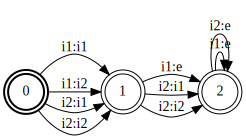

In [5]:
S = fst.compose(MK,AI.copy().invert())
S.arcsort()

## Output Language $L_O(\mathcal{S} \circ \mathcal{A}_I)$

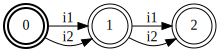

In [8]:
LO = fst.compose(S,AI).project(project_output=True)
LO = fst.determinize(fst.epsnormalize(LO)).minimize()
LO.arcsort()

## Controllability $L_O(\mathcal{S} \circ \mathcal{A}_I) \stackrel{?}{=} K$

In [7]:
K = fst.epsnormalize(MK.copy().project(project_output=True)).minimize().arcsort()
fst.equivalent(LO,K)

False